# **Analýza Vzťahu Medzi HDP a Strednou Dĺžkou Života (2000-2015)**


## Úvod

Tento projekt sa zameriava na hĺbkovú exploráciu dynamiky vzťahu medzi hrubým domácim produktom (HDP) a strednou dĺžkou života pri narodení (LEABY) v šiestich vybraných krajinách. Analýza pokrýva obdobie od roku 2000 do roku 2015, čo nám umožňuje pozorovať dlhodobé trendy, vplyv globálnych udalostí a individuálne trajektórie rozvoja.

**Analyzované krajiny:** Čile, Mexiko, Nemecko, Spojené štáty americké, Čína, Zimbabwe.

Cieľom je vizualizovať, ako sa ekonomický rast odráža na kvalite života, a identifikovať špecifické príbehy jednotlivých krajín.

Dáta

GDP Source:[World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD)national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## 1. Nastavenie Prostredia a Import Knižníc

V tejto sekcii importujeme všetky potrebné knižnice Pythonu, ktoré budeme používať pre manipuláciu s dátami (`pandas`, `numpy`) a pre vizualizáciu (`matplotlib`, `seaborn`). Nastavíme aj základné parametre pre grafy.

In [ ]:
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


## 2. Načítanie Dát

 Dáta sú uložené vo formáte CSV a obsahujú ročné hodnoty HDP (USD) a strednej dĺžky života pre každú zo šiestich vybraných krajín v rokoch 2000 až 2015.

**Dôležitá poznámka k dátovému rozsahu (2000-2015):** Hoci sú dostupné aj novšie dáta, toto obdobie bolo zámerne zvolené pre hĺbkové preskúmanie dynamiky pred a po globálnej finančnej kríze (2008-2009) a pre zachytenie kľúčových transformačných procesov v ekonomikách vybraných krajín.

In [ ]:
# Načítanie datasetu
df = pd.read_csv("all_data.csv")




,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [ ]:
import numpy as np # Pridane pre vyuzitie logaritmickych funkcii

# Zobrazenie prvých 5 riadkov DataFrame
print("Prvých 5 riadkov DataFrame:")
print(df.head())

print("\nInformácie o DataFrame (stĺpce, typy dát, non-null hodnoty):")
print(df.info())

print("\nDeskriptívna štatistika pre numerické stĺpce:")
print(df.describe())

print("\nKontrola chýbajúcich hodnôt:")
print(df.isnull().sum())

# Vytvorenie logaritmickej škály pre HDP
# Pre vyvarovanie sa chyby s log(0) alebo log(záporné číslo), skontrolujeme minimálnu hodnotu
# Ak je HDP 0 alebo záporné, bude potrebné to riešiť, ale pre HDP by nemalo byť.
df['GDP_log'] = np.log10(df['GDP'])
print("\nNový stĺpec 'GDP_log' bol vytvorený (logaritmická škála HDP).")
print(df.head())

Prvých 5 riadkov DataFrame:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10

Informácie o DataFrame (stĺpce, typy dát, non-null hodnoty):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory

In [ ]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP,GDP_log
0,Chile,2000,77.3,7.786093e+10,10.891320
1,Chile,2001,77.3,7.097992e+10,10.851136
2,Chile,2002,77.8,6.973681e+10,10.843462
3,Chile,2003,77.9,7.564346e+10,10.878771
4,Chile,2004,78.0,9.921039e+10,10.996557


In [ ]:
# Premenovanie stĺpca Life expectansy na kratší názov
df.rename(columns={"Life expectancy at birth (years)":"LEABY"}, inplace="True")
df.head(5)

,Country,Year,LEABY,GDP,GDP_log
0,Chile,2000,77.3,7.786093e+10,10.891320
1,Chile,2001,77.3,7.097992e+10,10.851136
2,Chile,2002,77.8,6.973681e+10,10.843462
3,Chile,2003,77.9,7.564346e+10,10.878771
4,Chile,2004,78.0,9.921039e+10,10.996557


## 4. Analýza a Vizualizácia Globálnych Trendov

Začneme pohľadom na celkové trendy strednej dĺžky života a HDP pre všetky krajiny v čase. Priemery a mediány nám pomôžu pochopiť celkový smer vývoja. Použitie logaritmickej škály pre HDP je nevyhnutné vzhľadom na jeho široký rozsah.


Vizualizácia globálneho trendu HDP (s logaritmickou škálou):

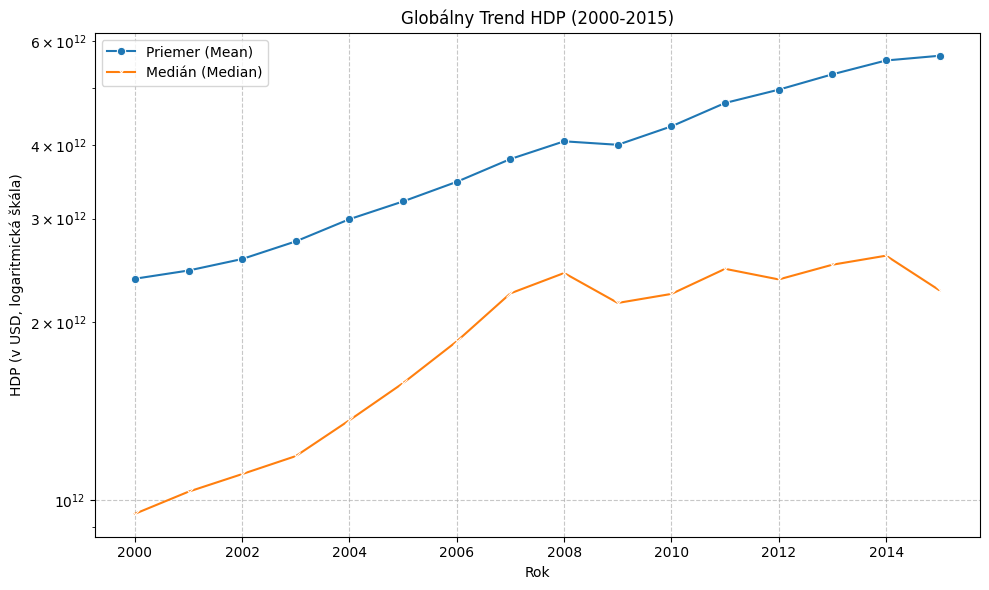

In [ ]:


# Predpoklad, že mean_by_year a median_by_year sú už vypočítané

plt.figure(figsize=(10, 6))
sns.lineplot(x=mean_by_year.index, y=mean_by_year['GDP'], label='Priemer (Mean)', marker='o')
sns.lineplot(x=median_by_year.index, y=median_by_year['GDP'], label='Medián (Median)', marker='x')

plt.title('Globálny Trend HDP (2000-2015)')
plt.xlabel('Rok')
plt.ylabel('HDP (v USD, logaritmická škála)')
plt.yscale('log') # NAJDÔLEŽITEJŠIE: Nastaví os Y na logaritmickú škálu
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

## 5. Analýza a Vizualizácia Trendov pre Jednotlivé Krajiny

Pre hlbšie pochopenie vývoja jednotlivých krajín vytvoríme samostatné grafy. Každý graf bude zobrazovať HDP (logaritmická škála) a strednú dĺžku života na dvoch nezávislých osiach Y, čo umožní vizuálne sledovať ich koevolúciu v čase pre každú krajinu.

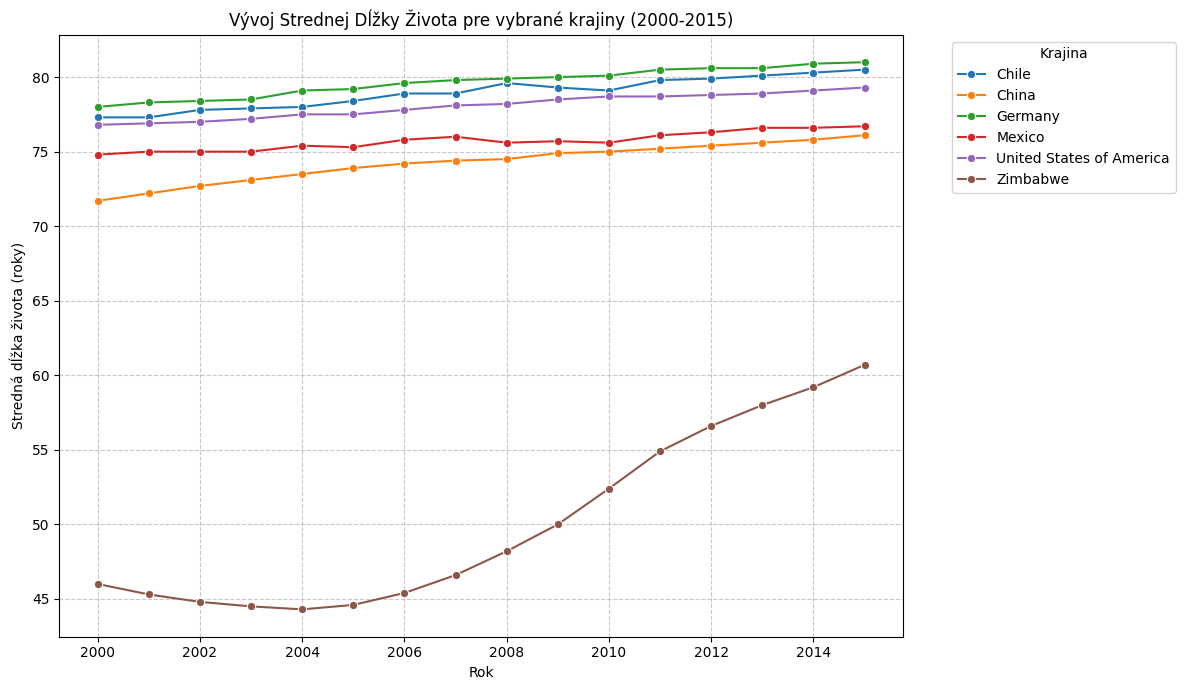

In [ ]:


plt.figure(figsize=(12, 7)) # Väčší graf pre viac čiar

# Čiarový graf pe každú krajinu
# Predpoklad, že 'df'  má stĺpce 'Country', 'Year', 'LEABY'
sns.lineplot(data=df, x='Year', y='LEABY', hue='Country', marker='o')

plt.title('Vývoj Strednej Dĺžky Života pre vybrané krajiny (2000-2015)')
plt.xlabel('Rok')
plt.ylabel('Stredná dĺžka života (roky)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Krajina', bbox_to_anchor=(1.05, 1), loc='upper left') # Legendu mimo grafu, aby nezakrývala čiary
plt.tight_layout()
plt.show()

Vizualizácia individuálnych trendov HDP pre každú krajinu (s logaritmickou škálou)

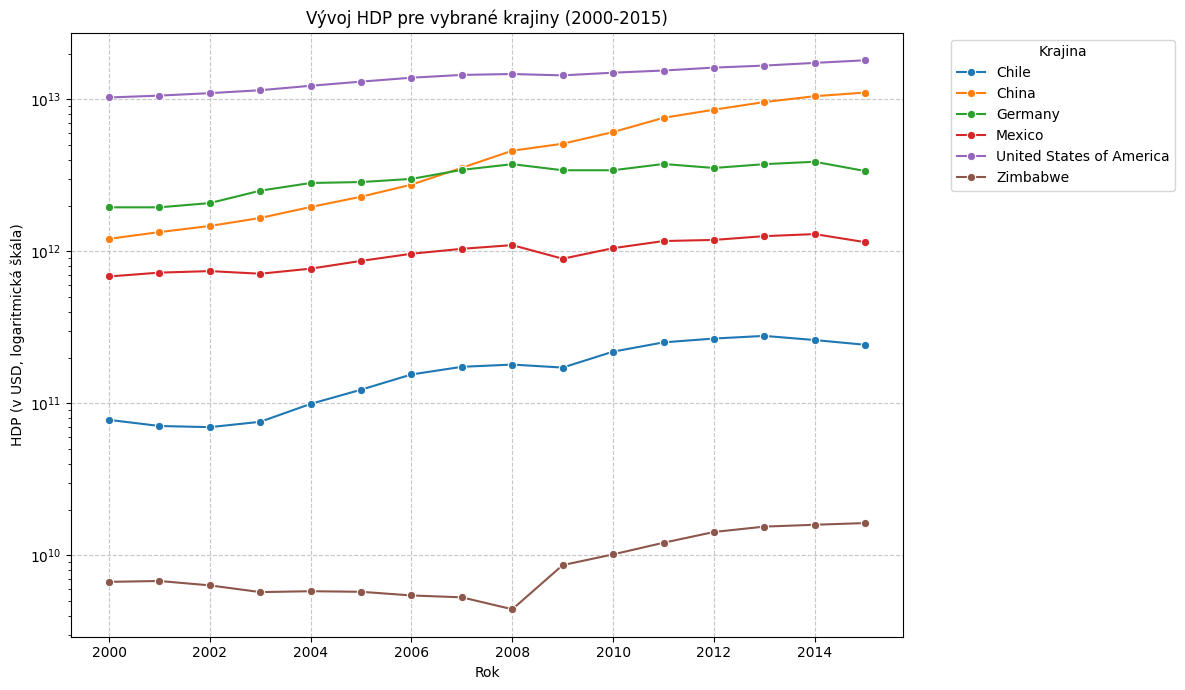

In [ ]:

plt.figure(figsize=(12, 7))

# Čiarové grafy pre každú krajinu
sns.lineplot(data=df, x='Year', y='GDP', hue='Country', marker='o')

plt.title('Vývoj HDP pre vybrané krajiny (2000-2015)')
plt.xlabel('Rok')
plt.ylabel('HDP (v USD, logaritmická škála)')
plt.yscale('log') # NAJDÔLEŽITEJŠIE: Nastaví os Y na logaritmickú škálu
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Krajina', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 6. Analýza Vzťahu HDP a Strednej Dĺžky Života (Bodové Grafy)

Na pochopenie priameho vzťahu medzi HDP a strednou dĺžkou života použijeme bodové grafy. Prehľadnosť dosiahneme zobrazením vzťahu pre kľúčové roky (začiatok a koniec obdobia) a tiež detailným pohľadom na ročný vývoj pomocou mriežky grafov ("small multiples"). Logaritmická škála HDP je zachovaná pre presnú vizualizáciu.

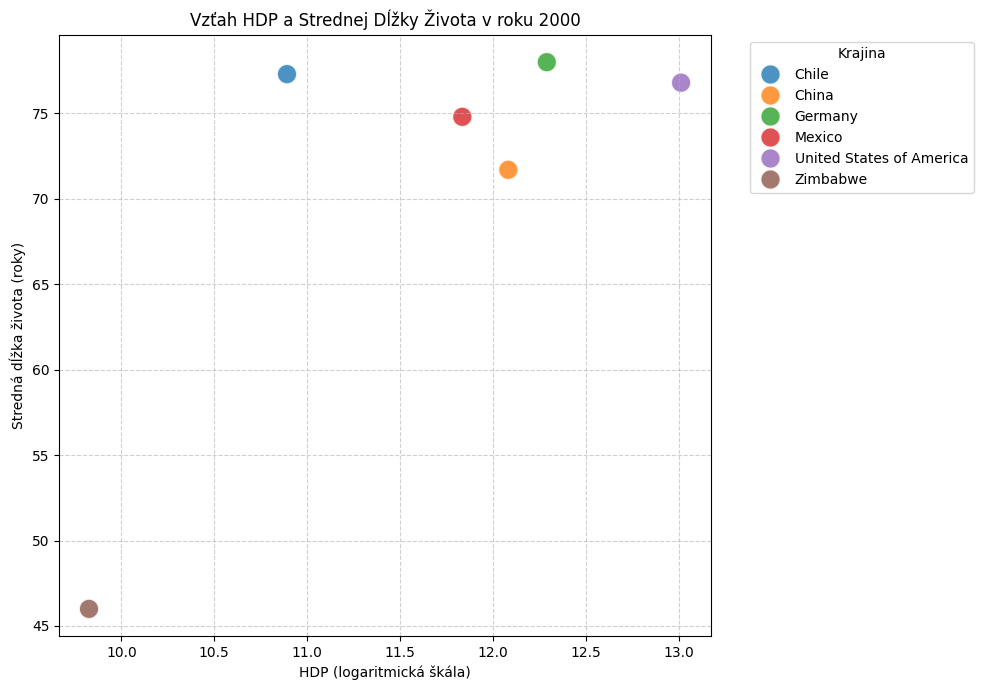

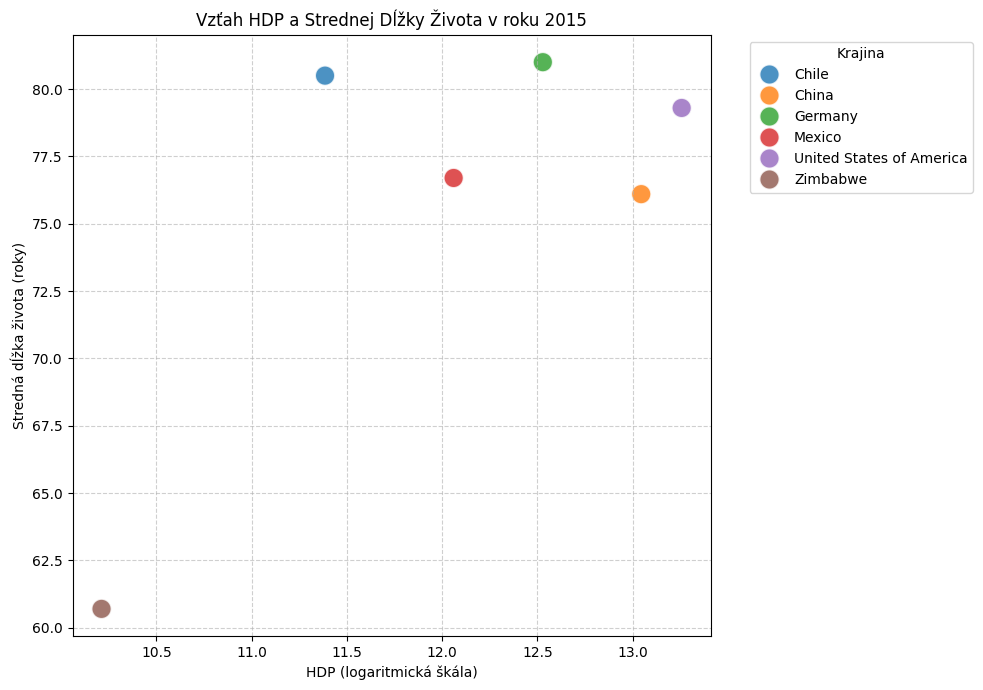

In [ ]:
# --- Graf pre rok 2000 ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df[df['Year'] == 2000],
    x="GDP_log",
    y="LEABY",
    hue="Country",
    s=200,
    alpha=0.8,
    legend="full"
)
plt.title('Vzťah HDP a Strednej Dĺžky Života v roku 2000')
plt.xlabel('HDP (logaritmická škála)')
plt.ylabel('Stredná dĺžka života (roky)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Krajina', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- Graf pre rok 2015 ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df[df['Year'] == 2015],
    x="GDP_log",
    y="LEABY",
    hue="Country",
    s=200,
    alpha=0.8,
    legend="full"
)
plt.title('Vzťah HDP a Strednej Dĺžky Života v roku 2015')
plt.xlabel('HDP (logaritmická škála)')
plt.ylabel('Stredná dĺžka života (roky)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Krajina', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()





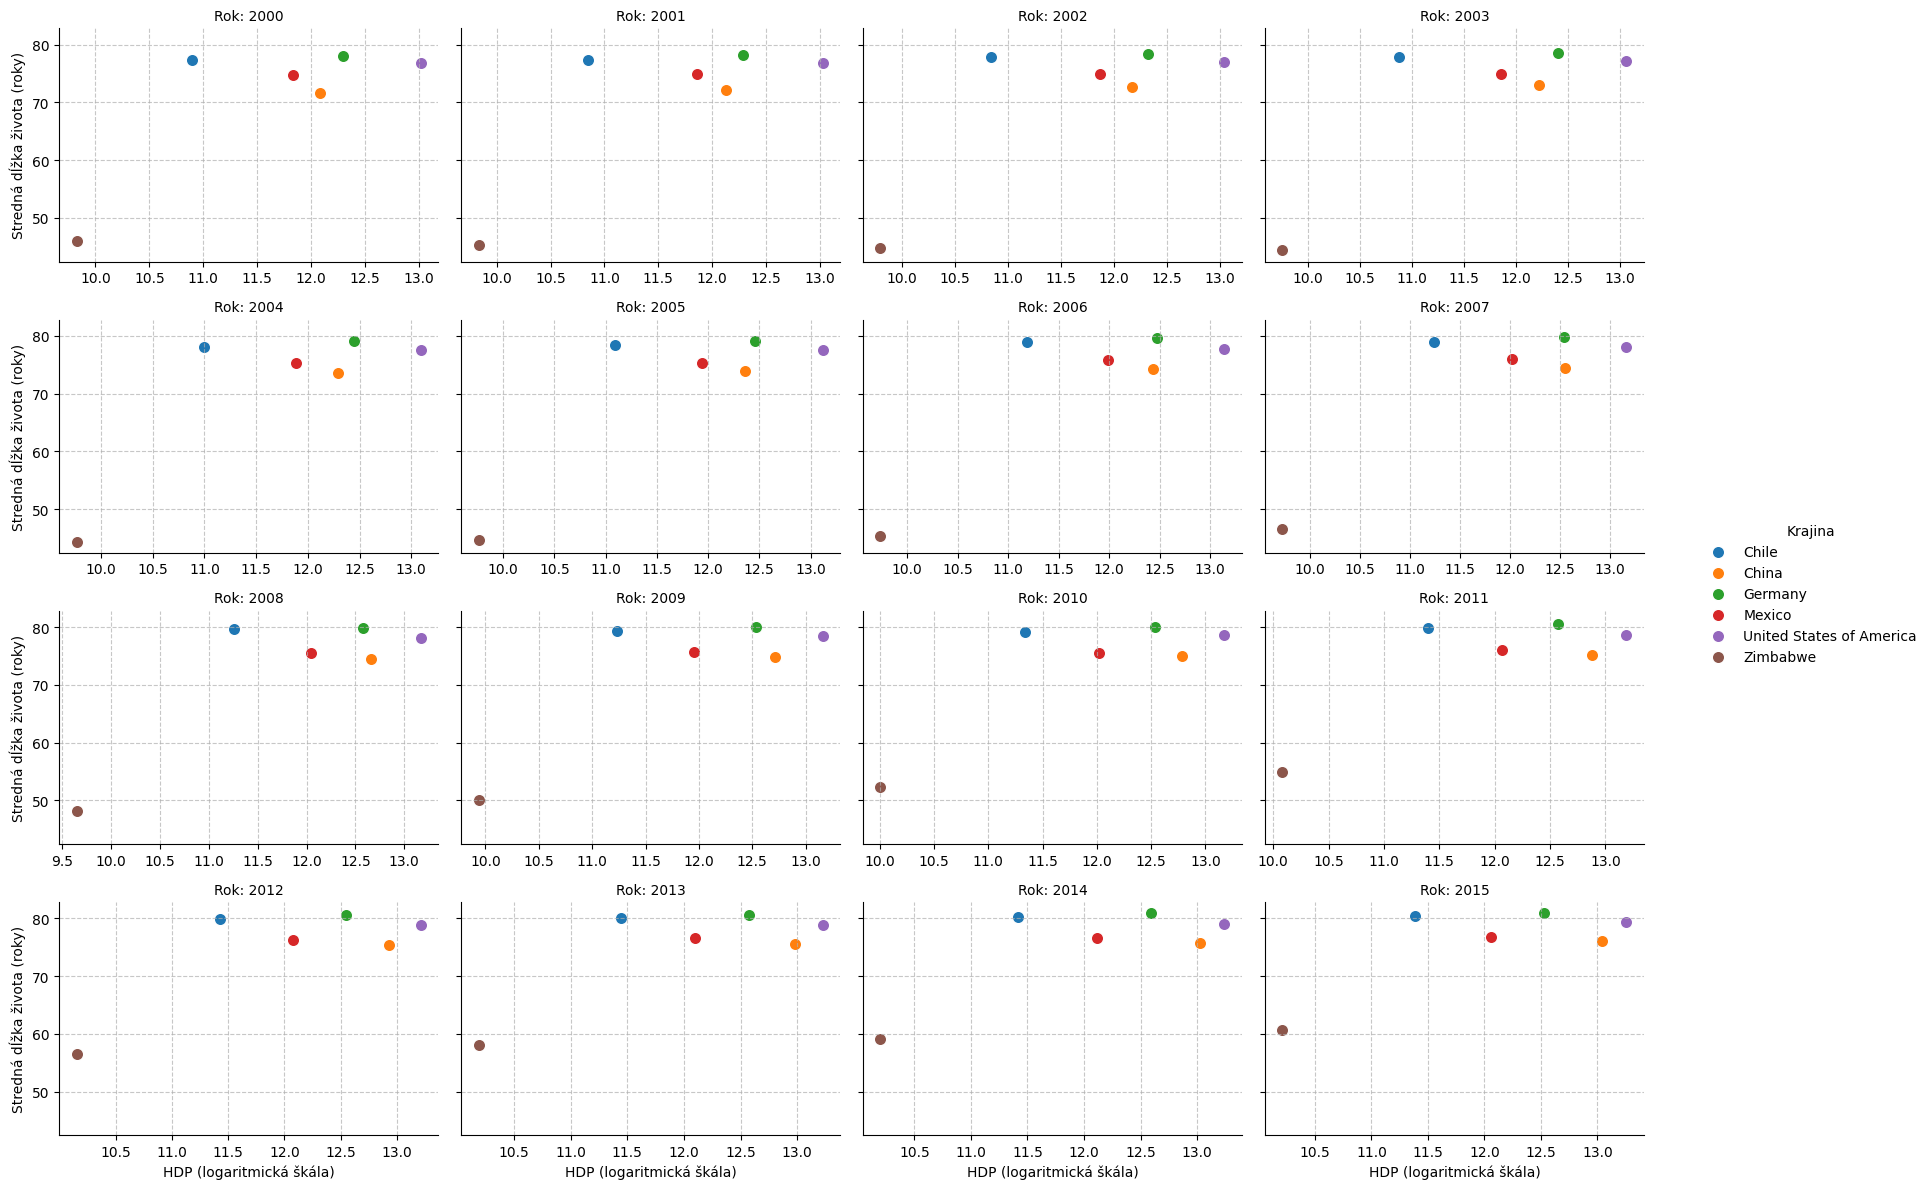

In [ ]:
# --- Faceted bodové grafy podľa rokov ---
g = sns.FacetGrid(
    df,
    col="Year",
    hue="Country",
    col_wrap=4,
    height=3,
    aspect=1.2,
    sharex=False,
    sharey=True
)
g.map(plt.scatter, "GDP_log", "LEABY", edgecolor="w", s=80)
g.set_titles("Rok: {col_name}")
g.set_axis_labels("HDP (logaritmická škála)", "Stredná dĺžka života (roky)")
g.add_legend(title="Krajina", bbox_to_anchor=(1.02, 0.5), loc='center left')
for ax in g.axes.flat:
    ax.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 7. Kľúčové Zistenia a Záver

Táto analýza poskytla komplexný pohľad na vzájomný vzťah medzi ekonomickým rozvojom (meraným HDP) a kvalitou života (meranou strednou dĺžkou života) v šiestich rôznorodých krajinách v rokoch 2000-2015.

**Hlavné závery zahŕňajú:**

* **Silná pozitívna korelácia:** Celkovo platí, že krajiny s vyšším HDP majú tendenciu mať aj vyššiu strednú dĺžku života, čo sa vizuálne prejavuje posunom dátových bodov smerom doprava a nahor na bodových grafoch.
* **Dynamický rast Číny:** Čína demonštrovala extrémne rýchly ekonomický rast, ktorý bol konzistentne sprevádzaný aj výrazným nárastom strednej dĺžky života, čím sa výrazne posunula nahor v rebríčku oboch ukazovateľov.
* **Príbeh zotavenia Zimbabwe:** Napriek počiatočným výzvam a dokonca poklesu strednej dĺžky života v prvých rokoch, Zimbabwe preukázalo pozoruhodné a strmé zlepšenie tohto ukazovateľa, hoci ekonomicky (HDP) jeho rast nebol taký výrazný. To podčiarkuje dôležitosť faktorov nad rámec bezprostredného HDP, ako sú verejné zdravie a humanitárna pomoc.
* **Stabilita rozvinutých ekonomík:** Krajiny ako Nemecko a USA si udržali vysoké úrovne HDP aj LEABY, pričom ich rast bol stabilný, ale miernejší, keďže už operujú na veľmi vysokých základných úrovniach.
* **Odlišné trajektórie:** Každá krajina má svoj vlastný jedinečný príbeh, ktorý ovplyvňujú nielen ekonomické, ale aj sociálne, politické a zdravotné faktory.

Táto analýza potvrdzuje, že hoci sú ekonomický rast a kvalita života silne prepojené, ich vzťah je nuansovaný a ovplyvnený špecifickými národnými podmienkami a reakciami na globálne udalosti.

---